In [34]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv('../Datasets/FinalData.csv')

In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,61,40,43,20.879744,82.002744,6.502985,202.935536,rice
1,84,37,37,21.770462,80.319644,7.038096,226.655537,rice
2,71,45,38,23.004459,82.320763,7.840207,263.964248,rice
3,76,39,45,26.491096,80.158363,6.980401,242.864034,rice
4,84,38,36,20.130175,81.604873,7.628473,262.717340,rice


In [37]:
df.size

17600

In [38]:
df.shape

(2200, 8)

In [39]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [40]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [41]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [42]:
acc = []
model = []

In [43]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [44]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  95.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.73      1.00      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [45]:
dot_data = tree.export_graphviz(DecisionTree, out_file=None, 
                      feature_names=features.columns,  
                      class_names=df['label'].unique(),  
                      filled=True, rounded=True,  
                      special_characters=True)  

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
score = cross_val_score(DecisionTree,features,target,cv=5)

In [48]:
score

array([0.96818182, 0.90454545, 0.94545455, 0.95      , 0.94772727])

In [49]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [50]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99090909, 0.99545455, 0.99090909, 0.98636364])

In [51]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../APIs/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [52]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.14772727272727273
              precision    recall  f1-score   support

       apple       1.00      0.69      0.82        13
      banana       0.00      0.00      0.00        17
   blackgram       1.00      0.38      0.55        16
    chickpea       1.00      0.14      0.25        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.11      0.20        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       1.00      0.08      0.14        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.21      0.34        24
   muskmelon       1.00      0.22      0.36        23
      orange       1.00      0.03      0.

In [53]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.3       , 0.25      , 0.30227273, 0.21818182, 0.25909091])

In [54]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.88      0.88        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       0.95      0.90      0.92        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      0.82      0.82        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       1.00      1.00      1.00        23
       maize       0.86      0.90      0.88        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.89      0.89      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [55]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95227273, 0.95227273, 0.95227273, 0.96136364, 0.95681818])

<AxesSubplot:>

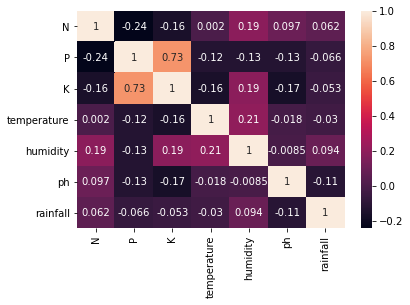

In [56]:
sns.heatmap(df.corr(),annot=True)

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[09:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        

In [63]:
score = cross_val_score(XB,features,target,cv=5)
score

[09:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.99090909, 0.99318182, 0.99545455, 0.99545455, 0.99090909])

In [64]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(Xtrain,Ytrain)

predicted_values = regressor.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [65]:
score = cross_val_score(regressor,features,target,cv=5)
score

array([0.99545455, 0.98636364, 0.99318182, 0.99545455, 0.99090909])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

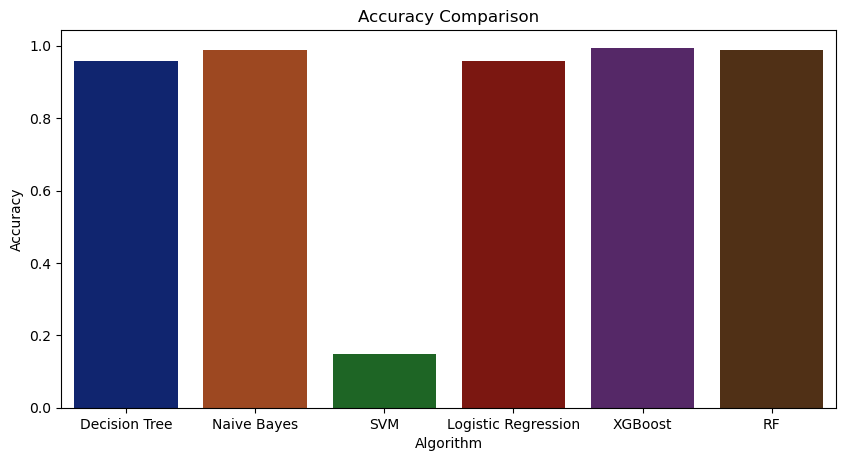

In [66]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [67]:
acc

[0.9590909090909091,
 0.9886363636363636,
 0.14772727272727273,
 0.9568181818181818,
 0.9931818181818182,
 0.9931818181818182,
 0.9886363636363636,
 0.9886363636363636]

In [68]:
model

['Decision Tree',
 'Naive Bayes',
 'SVM',
 'Logistic Regression',
 'XGBoost',
 'XGBoost',
 'RF',
 'RF']